In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('Black friday/train.csv')
test =  pd.read_csv('Black friday/test.csv')

In [7]:
train.shape

(550068, 12)

In [8]:
test.shape

(233599, 11)

In [9]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [11]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
train.describe(include='O')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [14]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [15]:
train.duplicated().sum()   # For checking duplicate rows.

# train.drop_duplicates(inplace=True)   # For remiving repeating rows.

0

In [16]:
train.drop(['User_ID'],axis=1,inplace=True)

In [17]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [18]:
# Check outlier values for train
# Write a funtion to impute missing values ---> (data,['col1','col2'],a)
# Write a function for categorical encoding ---> indicate which feature to do encoding

In [19]:
train['Product_Category_2'].unique()           # Its like discrete values and not continuous, so use mode just like category values for missing value treatment.

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
train['Purchase'].nunique()            # Example of continous values since this has 18105 unique values.

18105

In [5]:
train['Product_Category_2'].fillna(train['Product_Category_2'].mode()[0],inplace=True)

In [22]:
train['Product_Category_3'].isna().sum()

383247

In [6]:
train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0],inplace=True)

### Fixing Categorical fatures

In [7]:
train['Gender']=train['Gender'].map({'F':0,'M':1})

In [25]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,1,55+,16,C,4+,0,8,8.0,16.0,7969


In [26]:
train['Age'].value_counts().sort_index()

0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Age, dtype: int64

In [8]:
train['Age'].map({'0-17':1,'55+':2,'51-55':3,'46-50':4,'18-25':5,'36-45':6,'26-35':7})

0         1
1         1
2         1
3         1
4         2
         ..
550063    3
550064    7
550065    7
550066    2
550067    4
Name: Age, Length: 550068, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train['Age']=label_encoder.fit_transform(train['Age'])

In [29]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969


In [30]:
train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [14]:
city=pd.get_dummies(train['City_Category'],drop_first=True)

In [15]:
train=pd.concat([train,city],axis=1)

In [33]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969,0,1


In [34]:
train.drop('City_Category',axis=1,inplace=True)

In [35]:
train.drop('Product_ID',axis=1,inplace=True)

In [10]:
train.drop('User_ID',axis=1,inplace=True)

In [ ]:
train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
train['Stay_In_Current_City_Years'].dtype

dtype('O')

In [11]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].str.replace("+","")

C:\Users\Admin\AppData\Local\Temp/ipykernel_2412/234965655.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].str.replace("+","")


In [ ]:
train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,NaN,8370,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,0,0,10,2,0,12,NaN,NaN,1422,0,0
3,0,0,10,2,0,12,14.0,NaN,1057,0,0
4,1,6,16,4,0,8,NaN,NaN,7969,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int32  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  object 
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          376431 non-null  float64
 7   Product_Category_3          166821 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  uint8  
 10  C                           550068 non-null  uint8  
dtypes: float64(2), int32(1), int64(5), object(1), uint8(2)
memory usage: 36.7+ MB


In [12]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].astype(int)

In [16]:
train['B']=train['B'].astype(int)
train['C']=train['C'].astype(int)


In [ ]:
train.info()                             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int32  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int32  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          376431 non-null  float64
 7   Product_Category_3          166821 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  int32  
 10  C                           550068 non-null  int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 37.8 MB


In [39]:
train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,1,6,16,4,0,8,8.0,16.0,7969,0,1


### Visualization

In [2]:
import seaborn as sns

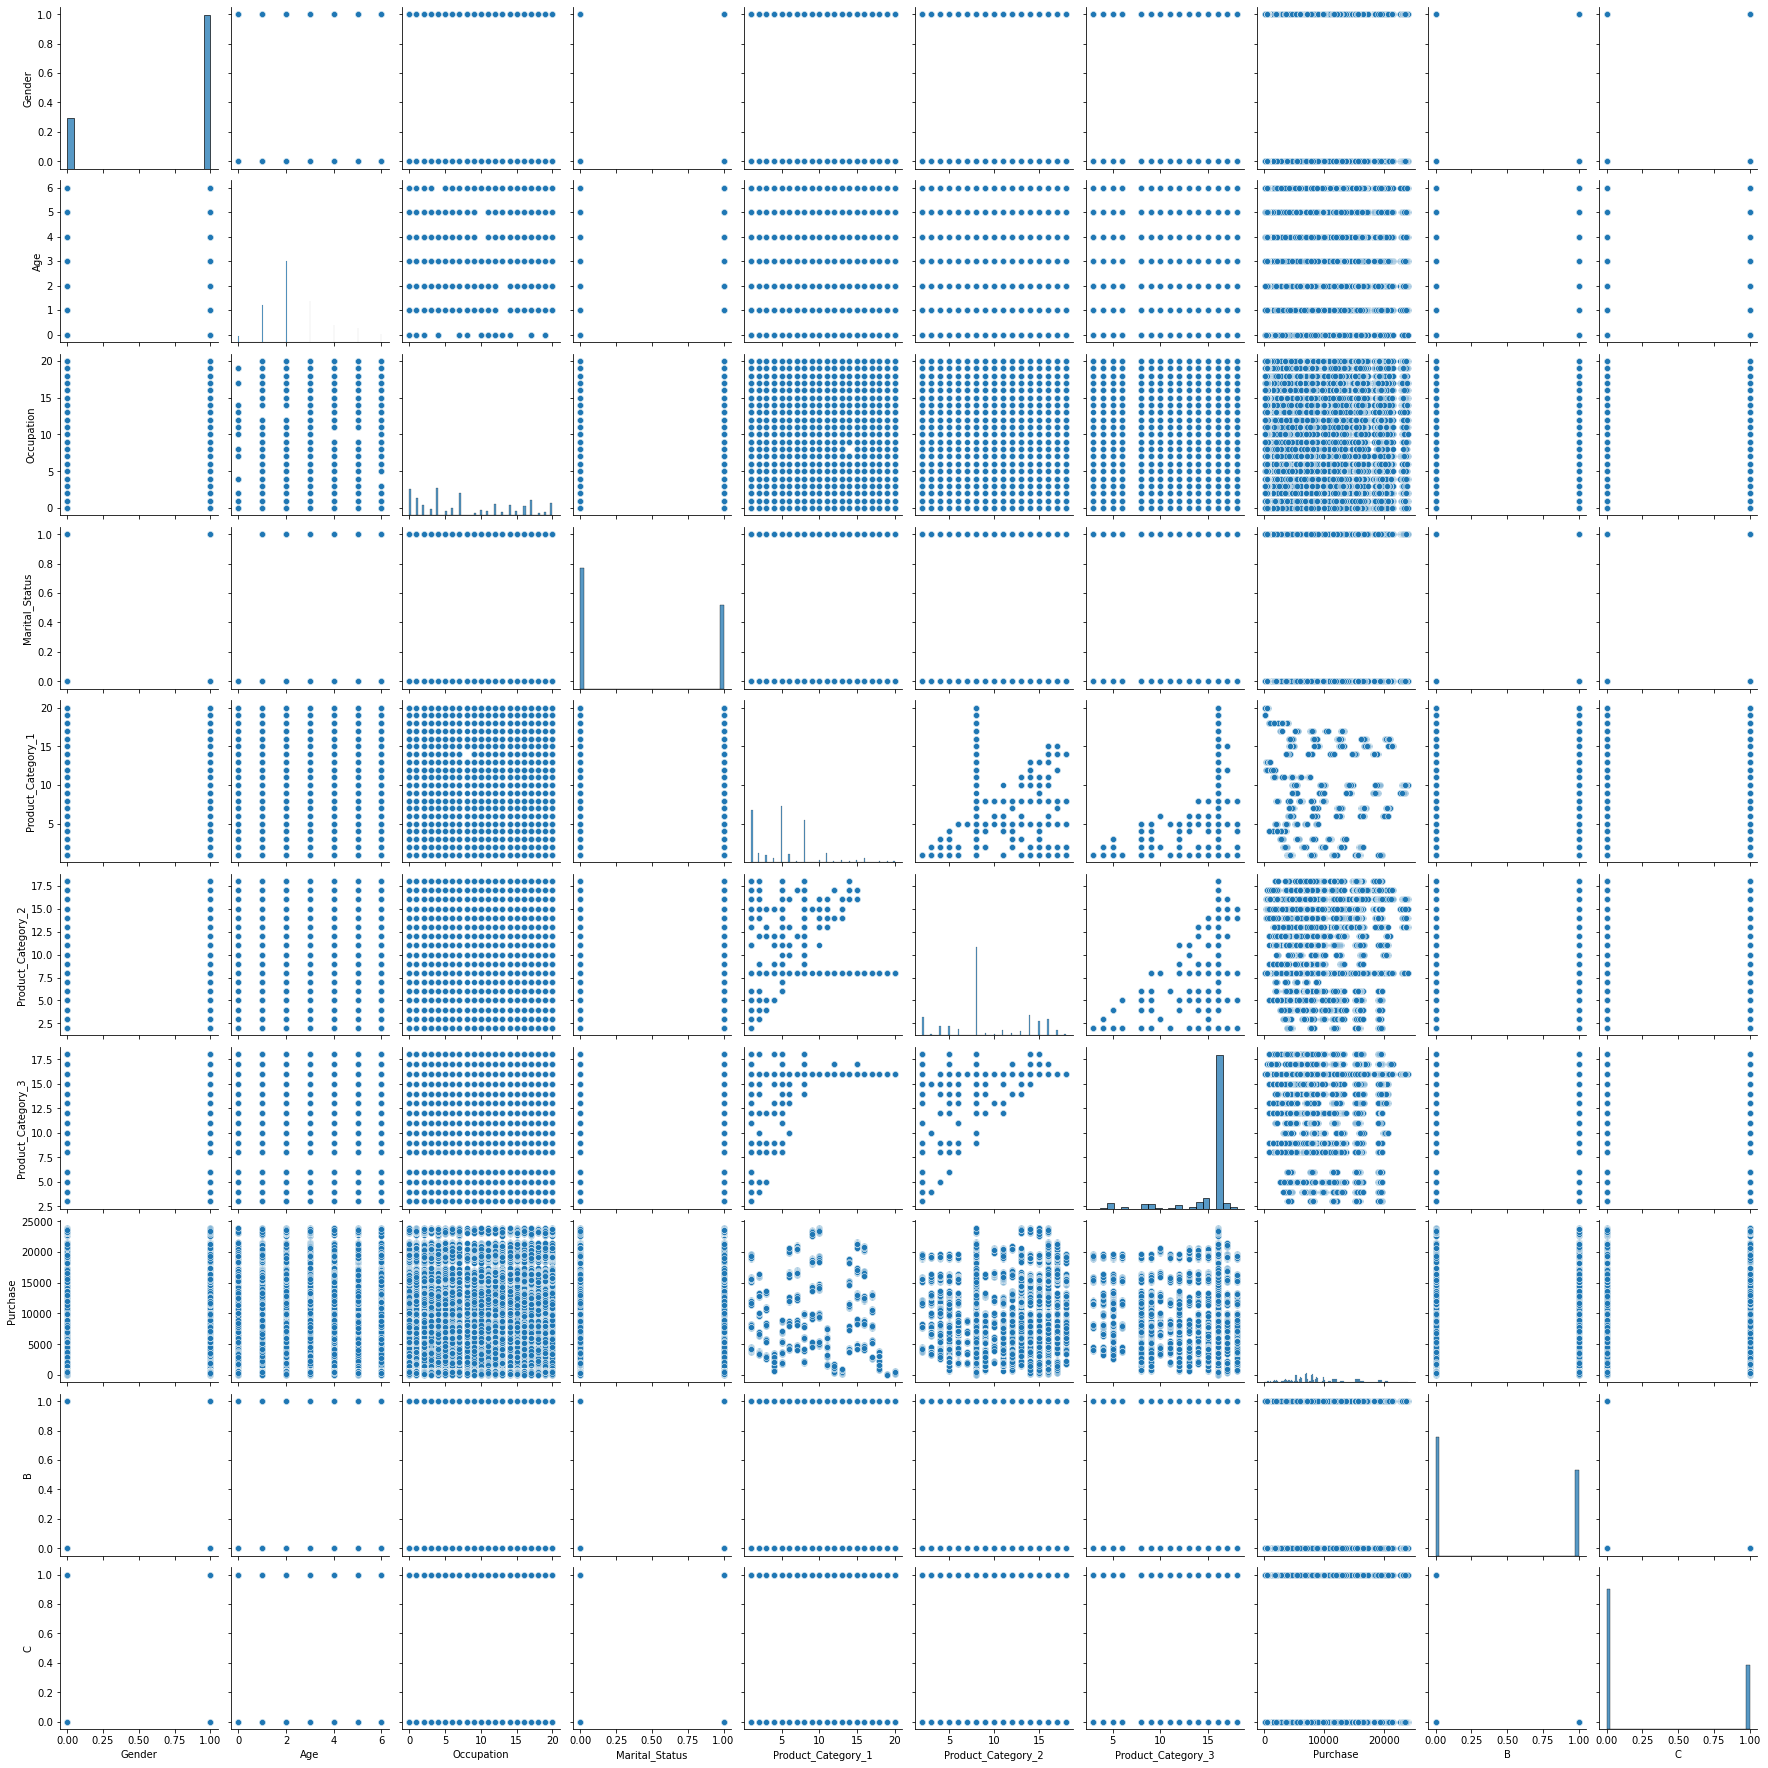

In [41]:
sns.pairplot(train)

In [ ]:
# Assignment

# 1. Occupation vs purchase --- withrespect to Gender
# 2. Product category 1 vs purchase --- withrespect to Gender
# 3. Product category 2 vs purchase --- withrespect to Gender
# 4. Product category 3 vs purchase --- withrespect to Gender


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

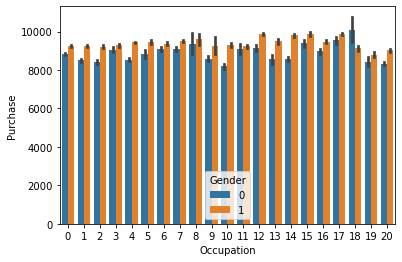

In [17]:
sns.barplot('Occupation','Purchase',hue='Gender',data=train)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

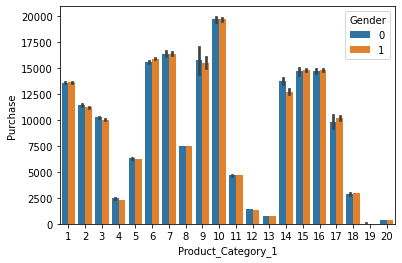

In [18]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=train)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

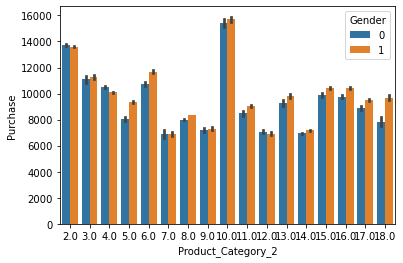

In [19]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=train)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

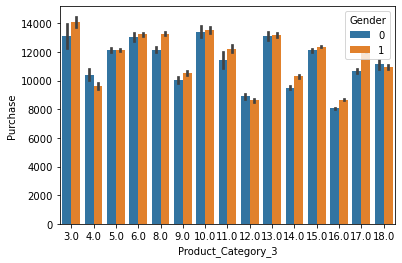

In [20]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=train)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

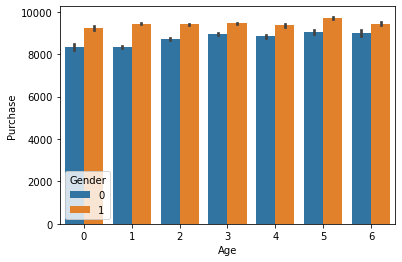

In [44]:
sns.barplot('Age','Purchase',hue='Gender',data=train)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
newtrain = sc.fit_transform(train)

In [49]:
pd.DataFrame(newtrain)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.746513,-1.844248,0.294864,0.109801,-0.833018,-0.610809,-0.293605,0.368792,-0.177973,-0.851422,-0.672143
1,-1.746513,-1.844248,0.294864,0.109801,-0.833018,-1.118912,-0.759362,-0.361176,1.181756,-0.851422,-0.672143
2,-1.746513,-1.844248,0.294864,0.109801,-0.833018,1.675656,-0.293605,0.368792,-1.561193,-0.851422,-0.672143
3,-1.746513,-1.844248,0.294864,0.109801,-0.833018,1.675656,1.103664,0.368792,-1.633858,-0.851422,-0.672143
4,0.572570,2.588277,1.214734,1.660861,-0.833018,0.659449,-0.293605,0.368792,-0.257805,-0.851422,1.487778
...,...,...,...,...,...,...,...,...,...,...,...
550063,0.572570,1.849523,0.754799,-0.665728,1.200454,3.708069,-0.293605,0.368792,-1.771025,1.174506,-0.672143
550064,-1.746513,-0.366739,-1.084943,0.885331,-0.833018,3.708069,-0.293605,0.368792,-1.770428,-0.851422,1.487778
550065,-1.746513,-0.366739,1.061423,1.660861,1.200454,3.708069,-0.293605,0.368792,-1.817013,1.174506,-0.672143
550066,-1.746513,2.588277,-1.084943,0.109801,-0.833018,3.708069,-0.293605,0.368792,-1.771623,-0.851422,1.487778
